In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
corona = pd.read_csv("C:/Users/HYACINTH OSEJI/Downloads/covid19_Confirmed_dataset.csv")
corona.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
corona.shape

(266, 104)

In [4]:
corona.drop(['Lat','Long'], axis=1, inplace=True)
#corona.head()

In [5]:
# Aggregation on the countries
corona_aggregated = corona.groupby('Country/Region').sum()
corona_aggregated.drop(['Province/State'], axis=1, inplace=True)
corona_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


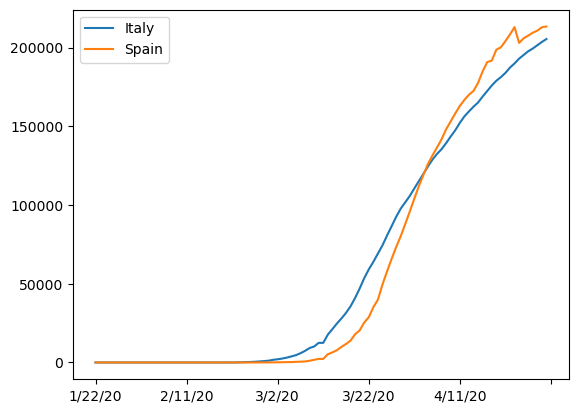

In [6]:
corona_aggregated.loc['Italy'].plot()
corona_aggregated.loc['Spain'].plot()
plt.legend()

In [7]:
# Calculate max number of new infected cases per day for one country
#corona_aggregated.loc['Spain'].diff().plot()

In [8]:
corona_aggregated.loc['Spain'].diff().max()

9630.0

In [9]:
# Find maximum infection rate for all countries and including in the original dataframe
countries = list(corona_aggregated.index)
max_infection_rates = []
for country in countries:
    max_infection_rates.append(corona_aggregated.loc[country].diff().max())
corona_aggregated['max_infection_rate'] = max_infection_rates

corona_data = pd.DataFrame(corona_aggregated['max_infection_rate'])
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [10]:
happiness_report = pd.read_csv("C:/Users/HYACINTH OSEJI/Downloads/worldwide_happiness_report.csv")
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [11]:
# Drop useless columns
useless = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']
happiness_report.drop(useless, axis=1, inplace=True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [12]:
# Change indices
happiness_report.set_index('Country or region', inplace=True)

# Join the two datasets
combined = corona_data.join(happiness_report, how='inner')

<Axes: >

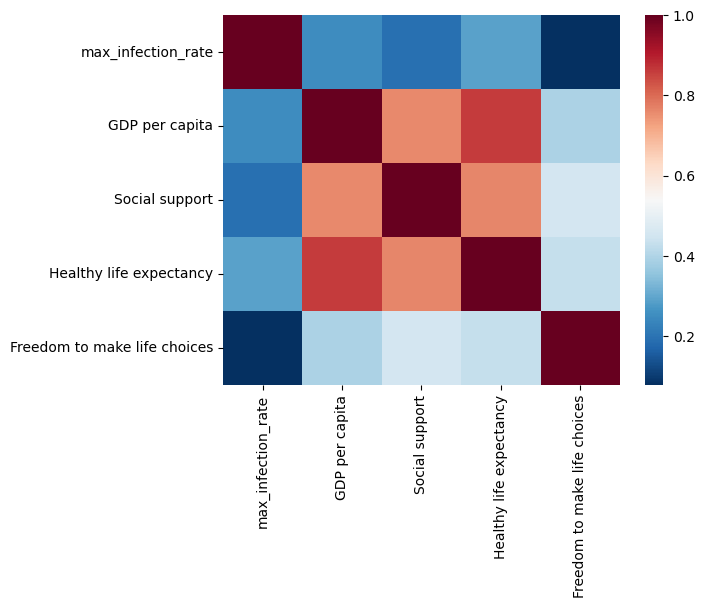

In [15]:
# Correlation matrix
c = combined.corr()
sns.heatmap(c, cmap='RdBu_r')

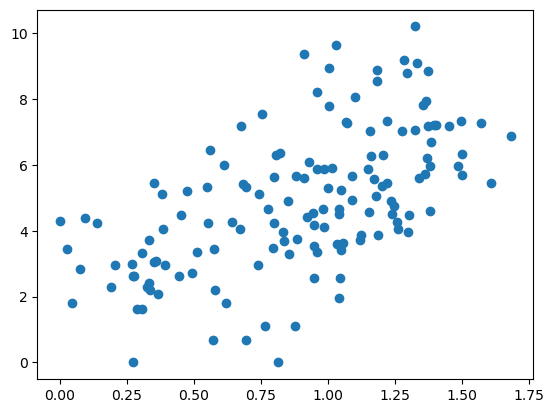

In [14]:
# Visualizing results
X  = combined['GDP per capita']
y = combined['max_infection_rate']
# Scale the y axis
plt.scatter(X, np.log(y))